<a href="https://colab.research.google.com/github/samuel-engel/house_prices_team_challenge/blob/master/Team_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/samuel-engel/house_prices_team_challenge.git

Cloning into 'house_prices_team_challenge'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [0]:
# math and data science
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from subprocess import check_output
print(check_output(["ls", "house_prices_team_challenge/house-prices-data"]).decode("utf8"))

data_description.txt
sample_submission.csv
test.csv
train.csv



In [0]:
# default path for accesing the data
path = 'house_prices_team_challenge/house-prices-data/'


In [6]:
train_data = pd.read_csv(path + '/train.csv')
train_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# check for duplicate IDs
unique_ids = len(set(train_data.Id))
total_ids = train_data.shape[0]
duplicate_ids = total_ids - unique_ids
print("Duplicate IDs: " + str(duplicate_ids))

# save id column
train_data_id = train_data['Id']
# temporarily drop the id column 
train_data.drop(['Id'], axis = 1, inplace = True)


Duplicate IDs: 0


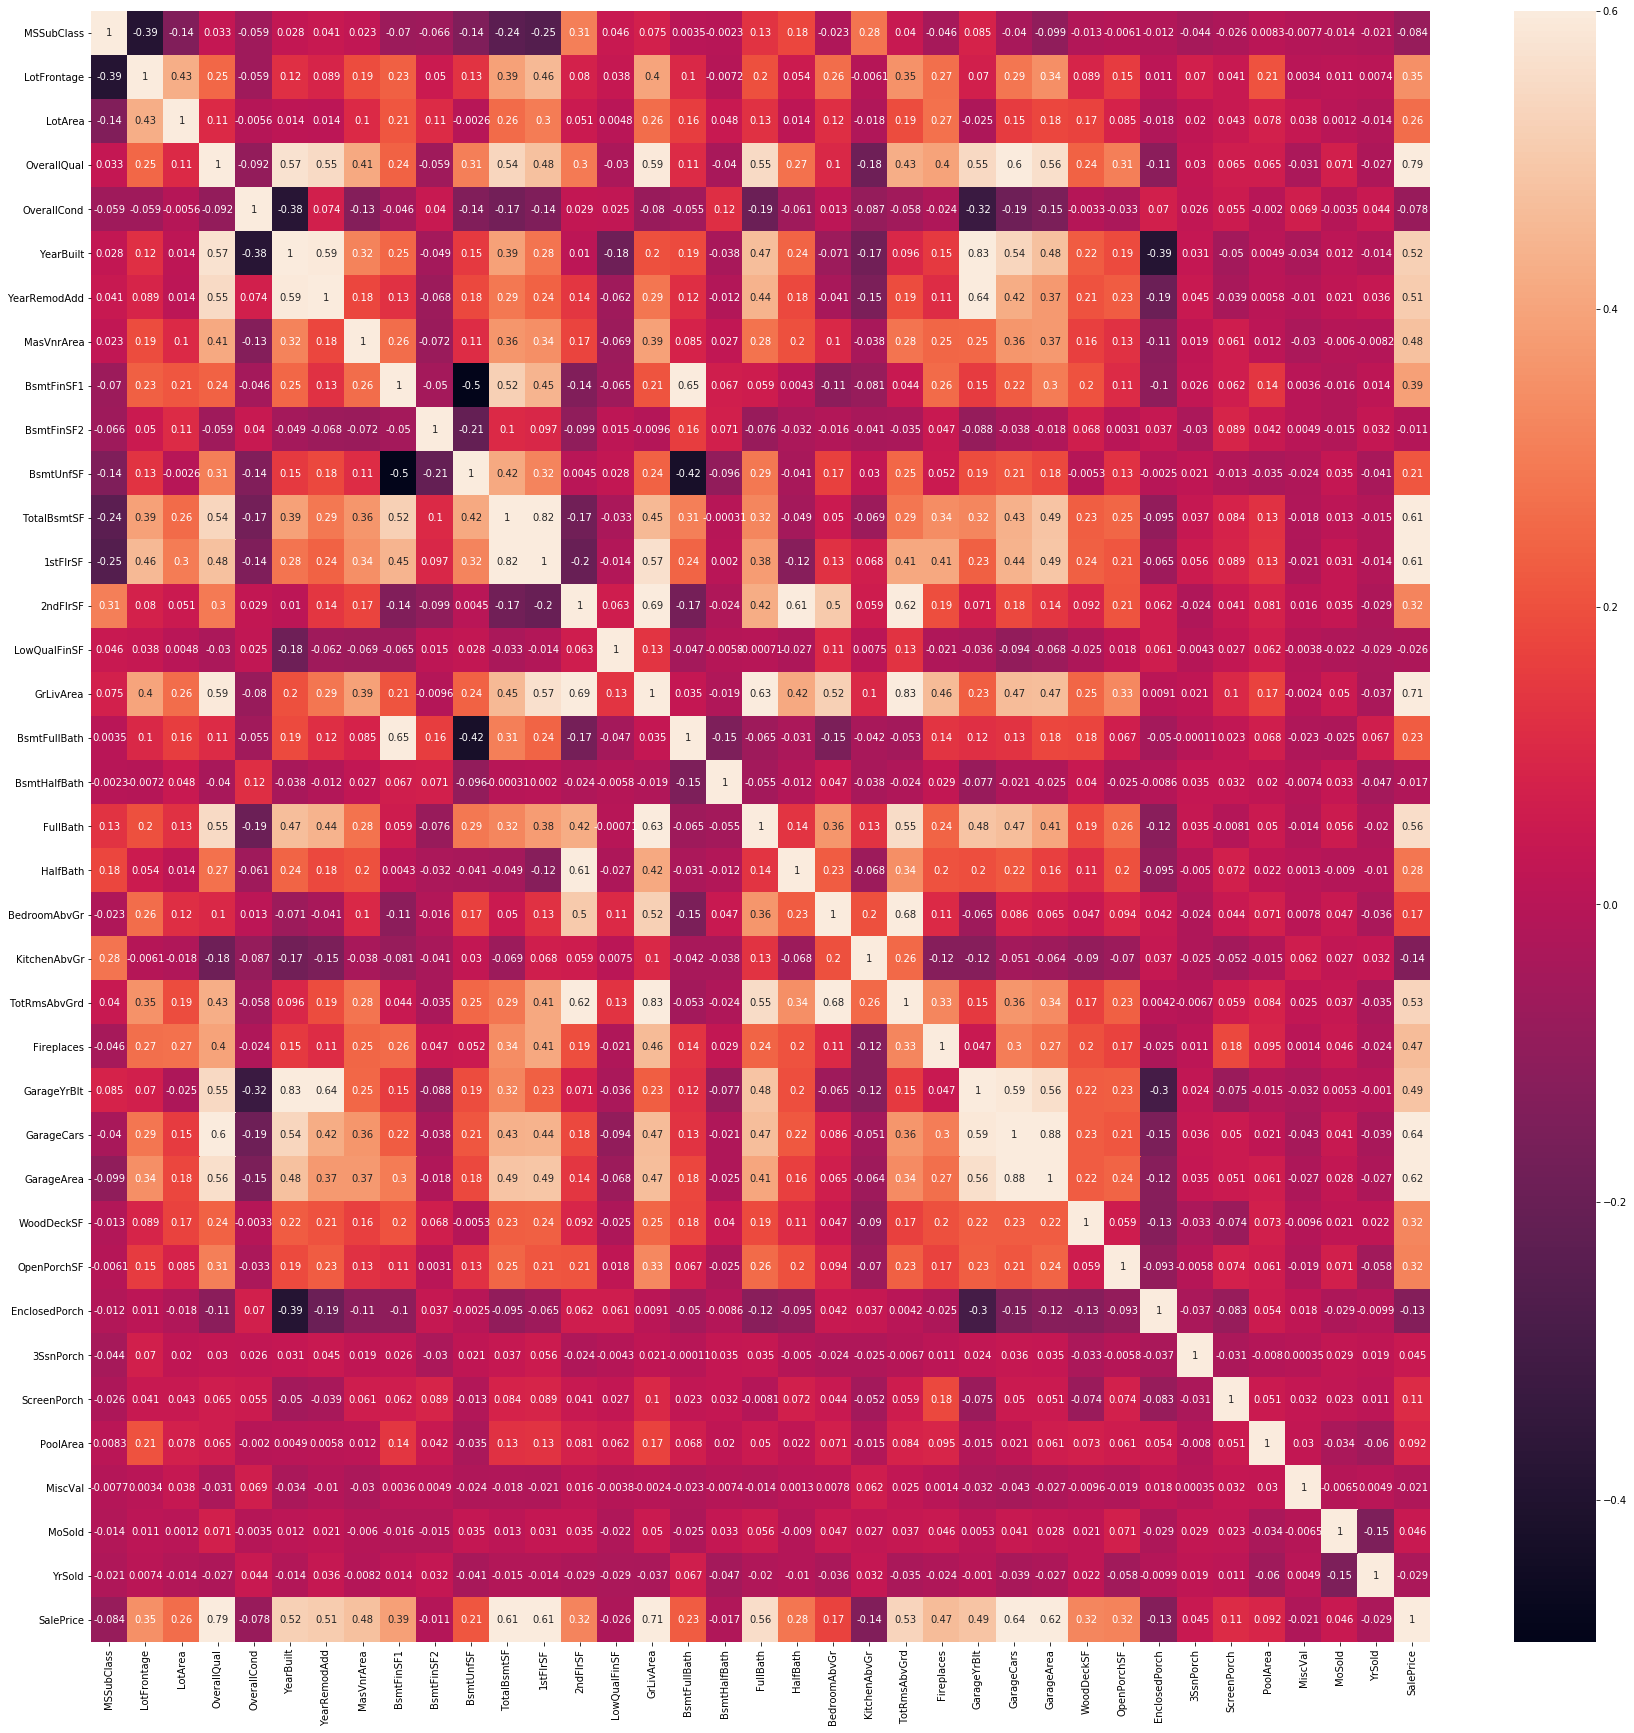

In [8]:
correlation_matrix = train_data.corr()
plt.subplots(figsize=(30, 30))
# plt.margins(y = 0.8)
sns.heatmap(correlation_matrix, vmax=0.6, annot=True);

This has given us a visualization of the data, and we can see that we really only need the last row/column (both show the same data, so it doesn't matter which we look at)

We need to extract this first, and will store it in a variable called 'sales_correlation'.

In [21]:
# print(correlation_matrix.SalePrice) # prints out the single row
sales_correlation = {key:value for (key, value) in dict(correlation_matrix.SalePrice).items() if value >= 0.5 and value < 1.0}
print(sales_correlation)
print(len(sales_correlation))

{'OverallQual': 0.7909816005838047, 'YearBuilt': 0.5228973328794967, 'YearRemodAdd': 0.5071009671113867, 'TotalBsmtSF': 0.6135805515591944, '1stFlrSF': 0.6058521846919166, 'GrLivArea': 0.7086244776126511, 'FullBath': 0.5606637627484452, 'TotRmsAbvGrd': 0.5337231555820238, 'GarageCars': 0.640409197258349, 'GarageArea': 0.6234314389183598}
10


In [23]:
result = sum(sales_correlation.values())
print(result)

6.107264668945628
